<a href="https://colab.research.google.com/github/cgonzalez022407-art/Proyecto_Iintegrador_Supervisado/blob/main/Trabajo_Integrado_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - ICARO
_________________________________
Clase: 13
Tema: Proyecto integrador - Supervisado
_________________________________


## Objetivo:
- Aplicar un flujo de trabajo de Machine Learning de principio a fin para resolver un problema de clasificación y uno de regresión, utilizando el dataset "Wine Quality".

---

## Índice

1. [Imports y Configuración Inicial](#imports)
2. [Carga y Preparación de Datos](#carga)
3. [Análisis Exploratorio de Datos (EDA)](#eda)
4. [**Tarea 1: Clasificación (Predecir Tipo de Vino)**](#clasificacion)
    - 4.1. [Preparación de Datos para Clasificación](#prep_clasificacion)
    - 4.2. [Modelos Base de Clasificación](#modelos_base_clasificacion)
    - 4.3. [**(A COMPLETAR) Modelos Avanzados y Optimización**](#completar_clasificacion)
    - 4.4. [**(A COMPLETAR) Tabla de Resultados y Conclusión de Clasificación**](#conclusion_clasificacion)
5. [**Tarea 2: Regresión (Predecir Calidad del Vino)**](#regresion)
    - 5.1. [Preparación de Datos para Regresión](#prep_regresion)
    - 5.2. [Modelo Base de Regresión](#modelo_base_regresion)
    - 5.3. [**(A COMPLETAR) Modelos Avanzados y Optimización**](#completar_regresion)
    - 5.4. [**(A COMPLETAR) Tabla de Resultados y Conclusión de Regresión**](#conclusion_regresion)
6. [**(A COMPLETAR) Conclusiones Finales del Proyecto**](#final)

---


## Reconocimiento inicial del dataset
**Rol:** Científico de Datos JR (yo) + SR (profe)  
**Objetivo de esta sección:** cargar el dataset y verificar forma, tipos, nulos, duplicados y **candidatos a target** (sin crear variables nuevas aún).

**Checklist:**
- Shape (filas/columnas)
- Tipos de datos correctos
- Nulos y duplicados cuantificados
- Columna candidata a *target* identificada


## Descripción del dataset (breve)
Cada fila representa una muestra de vino con medidas fisicoquímicas obtenidas en laboratorio y una evaluación sensorial de calidad.

**Columnas típicas (si es Wine Quality):**
- `fixed_acidity` → acidez fija (g/dm³)
- `volatile_acidity` → acidez volátil (g/dm³)
- `citric_acid` → ácido cítrico (g/dm³)
- `residual_sugar` → azúcar residual (g/dm³)
- `chlorides` → cloruros (g/dm³)
- `free_sulfur_dioxide` → dióxido de azufre libre (mg/dm³)
- `total_sulfur_dioxide` → dióxido de azufre total (mg/dm³)
- `density` → densidad (g/cm³ aprox.)
- `pH` → pH (adimensional)
- `sulphates` → sulfatos (g/dm³)
- `alcohol` → % de alcohol por volumen
- `quality` → puntaje sensorial entero (≈ 0–10)



<a name="imports"></a>
#  1.Imports y Configuración Inicial
En esta primera celda, importaremos todas las librerías que necesitaremos para nuestro análisis.

In [68]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y Preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import sklearn





# Métricas de evaluación
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score,
                             mean_absolute_error, mean_squared_error, r2_score)

# Modelos clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelos regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# XGBoost (si está disponible)
from xgboost import XGBClassifier, XGBRegressor


<a name="carga"></a>
# 2.Carga y Preparación de Datos
Vamos a cargar los dos datasets (vino tinto y vino blanco), añadiremos una columna para identificar el tipo de vino y luego los uniremos en un único DataFrame.

In [37]:
# URLs de los datasets
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Carga de los dataframes
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Creación de la columna 'type'
df_red['type'] = 'red'
df_white['type'] = 'white'

# Unión de los dataframes
df = pd.concat([df_red, df_white], axis=0)

# Reseteamos el índice
df.reset_index(drop=True, inplace=True)

print("Forma del dataset combinado:", df.shape)
print("\nPrimeras 5 filas:")
display(df.head())

Forma del dataset combinado: (6497, 13)

Primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
print("\nInfo:")
df.info()

print("\nNulos por columna:")
display(df.isna().sum().to_frame("n_nulls").T)

print("\nDuplicados exactos:", df.duplicated().sum())

print("\nColumnas:")
print(list(df.columns))

print("\nResumen descriptivo (p1, p5, p95, p99):")
desc = df.describe(percentiles=[.01,.05,.95,.99]).T
display(desc)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Nulos por columna:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
n_nulls,0,0,0,0,0,0,0,0,0,0,0,0,0



Duplicados exactos: 1177

Columnas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']

Resumen descriptivo (p1, p5, p95, p99):


,count,mean,std,min,1%,5%,50%,95%,99%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,5.10000,5.7000,7.00000,9.800000,12.00000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.12000,0.1600,0.29000,0.670000,0.88000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.00000,0.0500,0.31000,0.560000,0.74000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,0.90000,1.2000,3.00000,15.000000,18.20000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.02100,0.0280,0.04700,0.102000,0.18616,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,4.00000,6.0000,29.00000,61.000000,77.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,11.00000,19.0000,118.00000,206.000000,238.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.98892,0.9899,0.99489,0.999392,1.00060,1.03898
pH,6497.0,3.218501,0.160787,2.72000,2.89000,2.9700,3.21000,3.500000,3.64000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.30000,0.3500,0.51000,0.790000,0.99000,2.00000


In [39]:
# Inspección liviana de columnas típicas de target (NO crea nada)
posibles_targets = [c for c in df.columns if c.lower() in ["target", "class", "label", "quality", "y"]]
print("Posibles columnas de target encontradas:", posibles_targets)

# Si hay una columna categórica/binaria evidente, mostrá distribución
for c in posibles_targets:
    print(f"\nDistribución de {c}:")
    display(df[c].value_counts(dropna=False).to_frame("conteo"))


Posibles columnas de target encontradas: ['quality']

Distribución de quality:


,conteo
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


**Conclusión:**

- **Shape:** 6.497 filas × 13 columnas.

- **Nulos**: 0 en todas las columnas.

- **Duplicados exactos:** 1.177 filas (≈ 18,1%).

- **Target candidato:** quality (entero 3–9).

- **Distribución de quality:**

    - **6:** 43,65%
    - **5:** 32,91%
    - **7:** 16,61%
    - **4:** 3,32%
    - **8:** 2,97%
    - **3:** 0,46%
    - **9:** 0,08%
→ Concentrado en calificaciones medias; colas muy chicas (3 y 9).

<a name="eda"></a>
# 3.Análisis Exploratorio de Datos (EDA)
Es fundamental entender nuestros datos antes de modelar. Realizaremos un análisis descriptivo y algunas visualizaciones clave.

In [40]:
# Información general y chequeo de nulos
print("Información del DataFrame:")
df.info()

print("\nEstadísticas Descriptivas:")
display(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Estadísticas Descriptivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Ahora voy a contar cuentos vinos hay por cada valor de quality, separando por type (red/white).

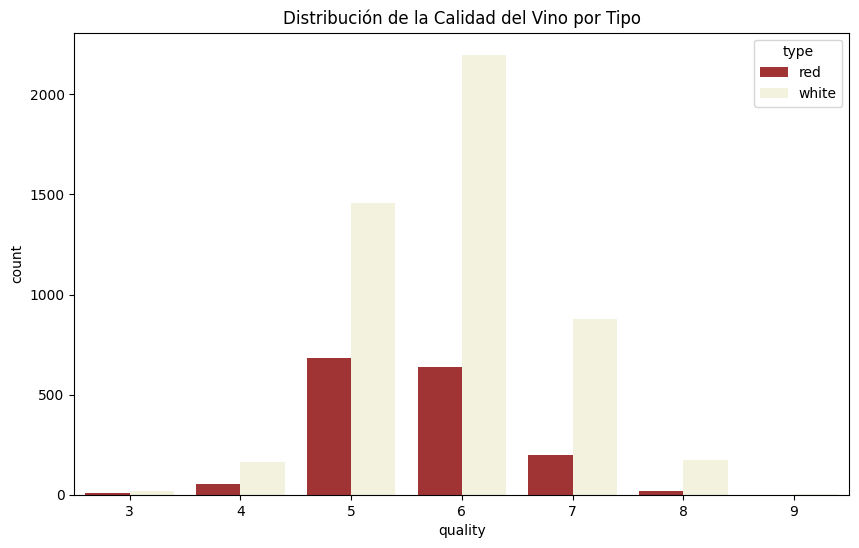

In [41]:
# Distribución de la variable 'quality' por tipo de vino
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', hue='type', palette={'red': '#B22222', 'white': '#F5F5DC'})
plt.title('Distribución de la Calidad del Vino por Tipo')
plt.show()

Se puede observar que la distribución es unimodal y está centrada en 5 y 6 (la mayor parte de los vinos).

White domina en todos los niveles (hay más filas de blancos en el dataset).

Hay pocos extremos (3, 9), colas muy finas.

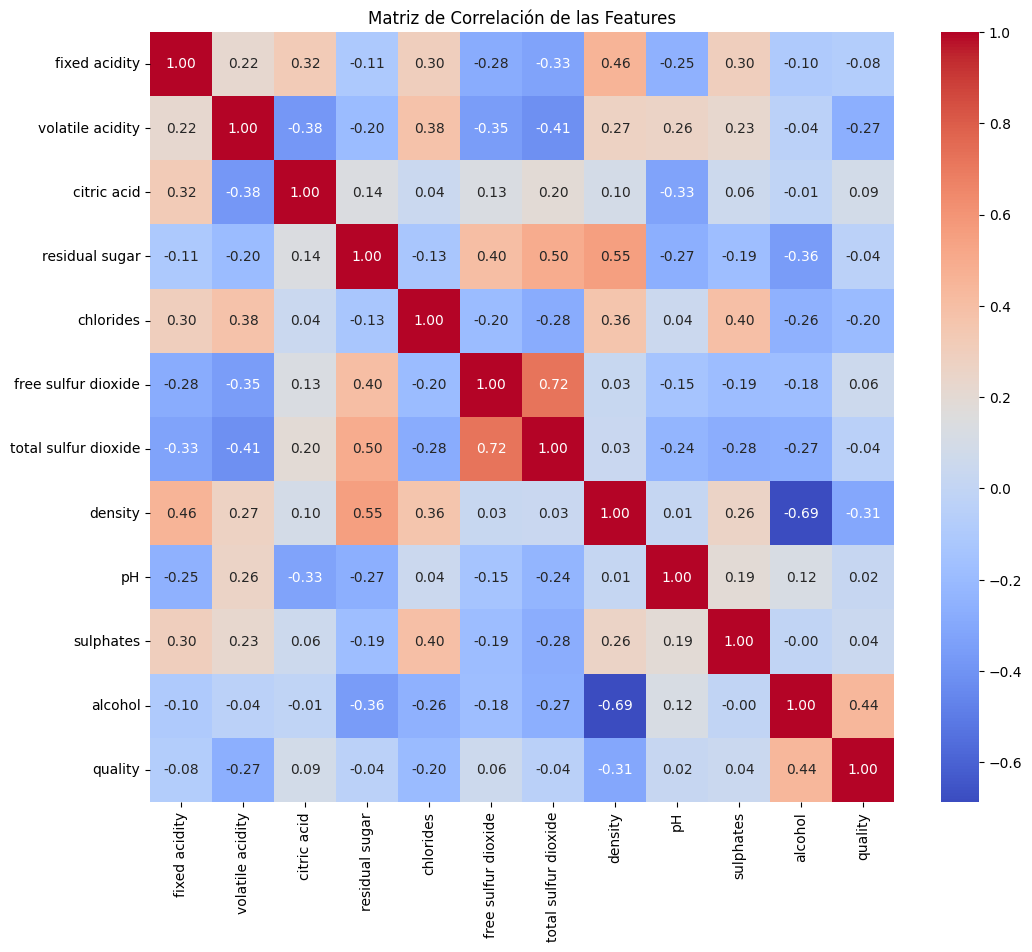

In [42]:
# Matriz de correlación de las variables fisicoquímicas
plt.figure(figsize=(12, 10))
# Excluimos la columna 'type' porque no es numérica
correlation_matrix = df.drop('type', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Features')
plt.show()

Los predictores con mayor asociación a quality son alcohol (+0.44) y, en negativo, density (–0.31) y volatile acidity (–0.27). Entre features, hay pares muy correlacionados (free vs total SO₂ ~ +0.72, residual sugar vs density ~ +0.55, alcohol vs density ~ –0.69), lo que sugiere revisar multicolinealidad en la etapa de modelado



### **(A COMPLETAR) Análisis del EDA**

**¿Existen valores nulos en el dataset?**

No. Todas las columnas tienen 6.497 valores no nulos.

**Variables más correlacionadas con quality**:
(tomando el heatmap que pegaste; signo y magnitud aproximada)

- alcohol: +0.44 (la más positiva)

- volatile acidity: –0.27 (relación negativa)

- density: –0.31 (negativa; densidad más alta suele asociar menor calidad)

- sulphates: +0.19 (positiva moderada)

- Otras cercanas a 0 (influencia baja linealmente): pH, free SO2, total SO2, etc.

**¿La distribución de calidad es similar en tintos y blancos? ¿Cómo es en general?**

En general, la calidad está concentrada en 5 y 6 (lo que ya vimos en el conteo global).

Por tipo:

- White suele tener más vinos en 5 y 6 y también concentra la mayor parte de 7 y 8 (tiene más muestras totales).

- Red también se concentra en 5–6; tiene menos casos en los extremos.

En resumen: distribución unimodal centrada en calificaciones medias; colas muy pequeñas en 3 y 9.

duplicados exactos = 1.177 (~18%). Conviene documentarlo para la etapa de particionado (evitar fuga).

Voy hacer un Top correlaciones absolutas con quality (sin incluir quality)

In [43]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr(method="pearson")

top_q = (corr["quality"]
         .drop("quality")
         .abs()
         .sort_values(ascending=False)
         .to_frame("abs_corr_with_quality"))
top_q["corr_signed"] = corr["quality"].drop("quality").loc[top_q.index]

display(top_q.head(10))


,abs_corr_with_quality,corr_signed
alcohol,0.444319,0.444319
density,0.305858,-0.305858
volatile acidity,0.265699,-0.265699
chlorides,0.200666,-0.200666
citric acid,0.085532,0.085532
fixed acidity,0.076743,-0.076743
free sulfur dioxide,0.055463,0.055463
total sulfur dioxide,0.041385,-0.041385
sulphates,0.038485,0.038485
residual sugar,0.036980,-0.036980


La variable
-  **abs_corr_with_quality** indica la **fuerza** de la relación (|r|).
- **corr_signed** indica el **sentido** (positivo/negativo).

**Top correlaciones con `quality`**
- alcohol: **+0.44** (fuerte positiva)
- density: **–0.31** (moderada-negativa)
- volatile acidity: **–0.27** (moderada-negativa)
- chlorides: **–0.20** (negativa)
- Resto: asociaciones débiles (|corr| < 0.10).

**Implicancia:** alcohol es el predictor lineal más informativo; density/volatile acidity aportan señal negativa. Habrá solapamiento entre clases cercanas (5–6–7), por lo que no esperamos separaciones “perfectas”.


Realizo un grafico para acompañar a la tabla

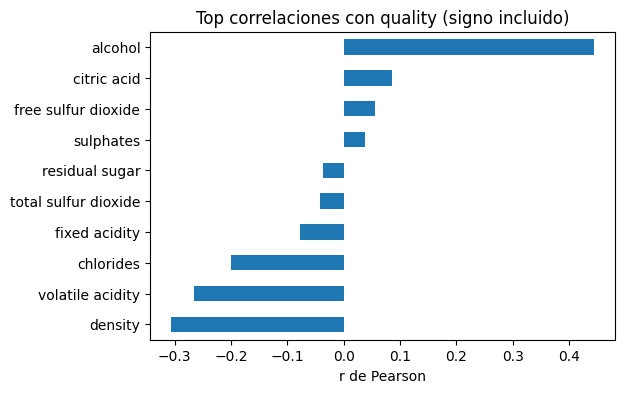

In [44]:
ax = top_q.head(10)["corr_signed"].sort_values().plot(kind="barh", figsize=(6,4))
ax.set_title("Top correlaciones con quality (signo incluido)")
ax.set_xlabel("r de Pearson")
plt.show()


Vamos a ver cómo varían las distribuciones
- alcohol con quality
- density con quality
- volatile acidity con quality

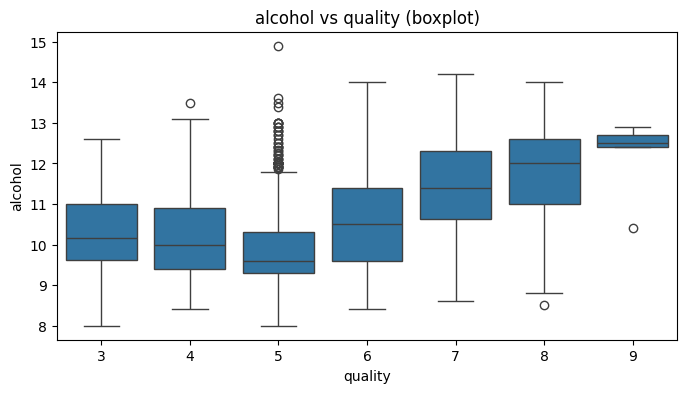

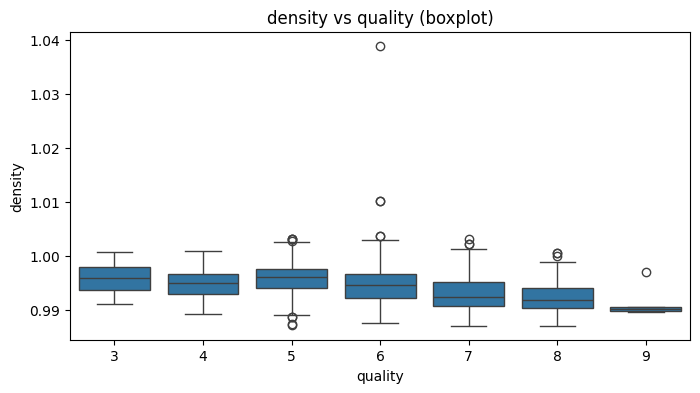

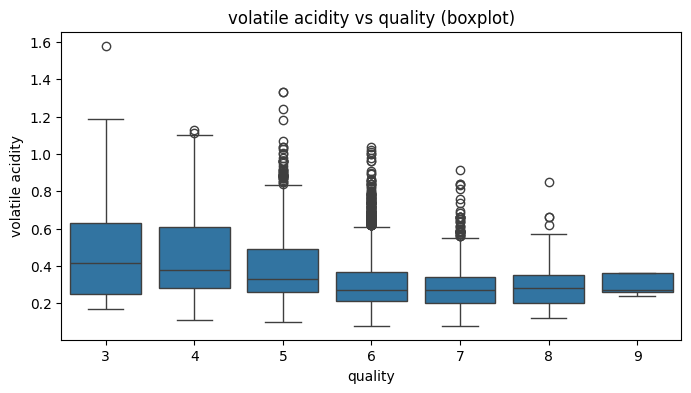

In [45]:
# Boxplots para las 3 variables con mayor |corr| con quality
top3 = top_q.index[:3].tolist()

for c in top3:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="quality", y=c, data=df)
    plt.title(f"{c} vs quality (boxplot)")
    plt.xlabel("quality"); plt.ylabel(c)
    plt.show()


Lo que observamos es que:

- alcohol: la mediana sube al aumentar quality.

- density: la mediana baja al aumentar quality.

- volatile acidity: la mediana baja con quality.

En los tres casos hay solapamiento fuerte entre 5–6–7 → separación difícil si binarizamos.


In [46]:
# Tasa de outliers por IQR (no modifica datos)
def iqr_outlier_rate(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s < low) | (s > high)).mean()

rates = {c: iqr_outlier_rate(df[c].dropna()) for c in num_cols if c != "quality"}
outlier_table = (pd.Series(rates)
                 .sort_values(ascending=False)
                 .to_frame("outlier_rate_IQR_1.5"))
display(outlier_table.head(10))


,outlier_rate_IQR_1.5
citric acid,0.078344
volatile acidity,0.058027
fixed acidity,0.054948
chlorides,0.044020
sulphates,0.029398
residual sugar,0.018162
pH,0.011236
free sulfur dioxide,0.009543
total sulfur dioxide,0.001539
density,0.000462


## Conclusiones EDA (provisorias)

- **Integridad:** 6.497 filas × 13 columnas; 0 nulos.

-  **Duplicados exactos:** ~18,1% (1.177 filas). Riesgo de fuga si no se remueven antes del split.

- **Distribución de quality:** unimodal, concentrada en 5–6; muy pocos extremos (3 y 9).

- **Por tipo (type):** white domina en cantidad; ambos tipos comparten el patrón centrado en 5–6.

- **Correlación con quality:**

    - alcohol +0.44 (positiva fuerte),
    - density –0.31 (negativa moderada),
    - volatile acidity –0.27 (negativa moderada),
    - chlorides –0.20 (negativa).
Resto con asociaciones débiles (|corr| < 0.10).

- **Boxplots (quality vs top features):** medianas coherentes con el signo (alcohol Sube, density baja, volatile acidity baja) y solapamiento fuerte entre 5–6–7 → la separación en clasificación no será trivial.

- **Outliers (IQR 1.5)**: más altos en citric_acid (7.8%), volatile_acidity (5.8%), fixed_acidity (5.5%), chlorides (4.4%); muy bajos en density (0.05%) y total_sulfur_dioxide (0.15%).


## 3.1 Decisiones de integridad y preprocesamiento (previas al modelado)

**Duplicados:** usar df_clean = df.drop_duplicates() antes del train/test split para evitar data leakage.

**Transformaciones:**

- type → One-Hot Encoding.

- Numéricas → comparar StandardScaler vs RobustScaler (este último más robusto a outliers).

- **Outliers:** evaluar RobustScaler y, como variante, capping 1–99 por variable dentro del pipeline (nunca sobre todo el dataset).



- **Particionado:** train_test_split(..., stratify=y_bin, random_state=42).



In [47]:
# Vista limpia sin duplicados (para usar en modelado)
df_clean = df.drop_duplicates().reset_index(drop=True)
print("Filas originales:", len(df))
print("Filas sin duplicados:", len(df_clean))
print("Duplicados removidos:", len(df) - len(df_clean))


Filas originales: 6497
Filas sin duplicados: 5320
Duplicados removidos: 1177


## 3.2 Tratamiento de outliers
- Dataset sin duplicados: **df_clean** con **5.320** filas.

Tratamiento de outliers (acordado con SR): En proyectos reales, los outliers se validan con referente de dominio. Aquí no contamos con esa instancia, por lo que adoptamos una regla conservadora y reproducible: eliminar filas que sean extremas (k=3.0) en ≥1 variable o moderadamente extremas (k=1.5) en ≥2 variables.
Esto evita borrar registros por desvíos leves aislados y remueve casos potencialmente ruidosos. Dejamos registrado el % eliminado y continuamos con df_no_out para modelado.

In [48]:
df_work = df_clean.copy()  # partimos de df_clean (ya sin duplicados)

num_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
            'chlorides','free sulfur dioxide','total sulfur dioxide','density',
            'pH','sulphates','alcohol']

def iqr_bounds(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return lo, hi

# 1) Tasa por columna (k=1.5 y k=3.0)
rows = []
for c in num_cols:
    lo15, hi15 = iqr_bounds(df_work[c], 1.5)
    lo30, hi30 = iqr_bounds(df_work[c], 3.0)
    r15 = ((df_work[c] < lo15) | (df_work[c] > hi15)).mean()
    r30 = ((df_work[c] < lo30) | (df_work[c] > hi30)).mean()
    rows.append([c, r15, r30, lo15, hi15, lo30, hi30])

out_col_table = pd.DataFrame(
    rows, columns=['col','rate_iqr15','rate_iqr30','lo15','hi15','lo30','hi30']
).sort_values('rate_iqr15', ascending=False)
display(out_col_table)

# 2) Conteo de outliers por FILA bajo cada k
mask_15 = pd.DataFrame({c: ((df_work[c] < iqr_bounds(df_work[c],1.5)[0]) | (df_work[c] > iqr_bounds(df_work[c],1.5)[1])) for c in num_cols})
mask_30 = pd.DataFrame({c: ((df_work[c] < iqr_bounds(df_work[c],3.0)[0]) | (df_work[c] > iqr_bounds(df_work[c],3.0)[1])) for c in num_cols})

df_work['outlier_count_k15'] = mask_15.sum(axis=1)
df_work['outlier_count_k30'] = mask_30.sum(axis=1)

print("Filas con ≥1 outlier (k=1.5):", (df_work['outlier_count_k15']>=1).mean())
print("Filas con ≥1 outlier (k=3.0):", (df_work['outlier_count_k30']>=1).mean())
print("Distribución de outliers por fila (k=1.5):")
display(df_work['outlier_count_k15'].value_counts().sort_index())


,col,rate_iqr15,rate_iqr30,lo15,hi15,lo30,hi30
0,fixed acidity,0.057143,0.013722,4.450000e+00,9.650000,2.50000,11.60000
1,volatile acidity,0.052444,0.006579,-4.000000e-02,0.680000,-0.31000,0.95000
4,chlorides,0.044549,0.022180,-4.000000e-03,0.108000,-0.04600,0.15000
9,sulphates,0.030639,0.005827,1.750000e-01,0.855000,-0.08000,1.11000
2,citric acid,0.026880,0.001880,-5.551115e-17,0.640000,-0.24000,0.88000
3,residual sugar,0.026504,0.000564,-6.750000e+00,16.050000,-15.30000,24.60000
8,pH,0.009211,0.000376,2.780000e+00,3.660000,2.45000,3.99000
5,free sulfur dioxide,0.008271,0.001504,-2.150000e+01,78.500000,-59.00000,116.00000
6,total sulfur dioxide,0.001880,0.000188,-4.487500e+01,272.125000,-163.75000,391.00000
7,density,0.000564,0.000188,9.853450e-01,1.003625,0.97849,1.01048


Filas con ≥1 outlier (k=1.5): 0.2056390977443609
Filas con ≥1 outlier (k=3.0): 0.04887218045112782
Distribución de outliers por fila (k=1.5):


,count
outlier_count_k15,
0,4226
1,854
2,204
3,32
4,4


**Diagnóstico (IQR):**
- Con **k=1.5**: filas con ≥1 outlier = **20,56%** (≈ 1.094 filas).
- Con **k=3.0**: filas con ≥1 outlier = **4,89%** (≈ 260 filas).
- Por columna (k=1.5), mayores tasas:
   - fixed_acidity **5,71%**,
   - volatile_acidity **5,24%**,
   - chlorides **4,45%**,
   - sulphates **3,06%**.

**Regla aplicada:**
- Eliminar filas con **(k=1.5) ≥ 2 columnas outlier** **o** **(k=3.0) ≥ 1 columna outlier**.

In [49]:
# Aplicar la regla mixta y reportar impacto
to_drop = (df_work['outlier_count_k15'] >= 2) | (df_work['outlier_count_k30'] >= 1)
n_drop = int(to_drop.sum())

df_no_out = df_work.loc[~to_drop].drop(columns=['outlier_count_k15','outlier_count_k30']).reset_index(drop=True)

print("Filas base (df_clean):", len(df_clean))
print("Marcadas para eliminación (regla mixta):", n_drop)
print("Filas resultantes (df_no_out):", len(df_no_out))
print("Porcentaje eliminado: {:.2f}%".format(100*n_drop/len(df_clean)))


Filas base (df_clean): 5320
Marcadas para eliminación (regla mixta): 375
Filas resultantes (df_no_out): 4945
Porcentaje eliminado: 7.05%


**Observación:**
- Filas eliminadas: **375** ( **7,05%** de 5.320 ).
- Dataset resultante: **df_no_out** con **4.945** filas.

In [50]:
# --- Reconstruimos máscaras y razones por fila (NO borra nada) ---
num_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
            'chlorides','free sulfur dioxide','total sulfur dioxide','density',
            'pH','sulphates','alcohol']

def iqr_bounds(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return lo, hi

# Recalcular máscaras sobre df_work (la misma base que usamos antes de borrar)
mask_15 = {}
mask_30 = {}
bounds = {}
for c in num_cols:
    lo15, hi15 = iqr_bounds(df_work[c], 1.5)
    lo30, hi30 = iqr_bounds(df_work[c], 3.0)
    bounds[c] = {'lo15':lo15,'hi15':hi15,'lo30':lo30,'hi30':hi30}
    mask_15[c] = (df_work[c] < lo15) | (df_work[c] > hi15)
    mask_30[c] = (df_work[c] < lo30) | (df_work[c] > hi30)

mask_15 = pd.DataFrame(mask_15, index=df_work.index)
mask_30 = pd.DataFrame(mask_30, index=df_work.index)

# Filas que se eliminaron según la regla aplicada
to_drop = (mask_15.sum(axis=1) >= 2) | (mask_30.sum(axis=1) >= 1)
dropped_idx = df_work.index[to_drop]

# Helper para explicar "por qué" se eliminó una fila
def reasons_for_row(i):
    cols_k30 = [c for c in num_cols if mask_30.loc[i, c]]   # extremos (k=3.0)
    cols_k15 = [c for c in num_cols if mask_15.loc[i, c]]   # moderados (k=1.5)
    return cols_k30, cols_k15

# Muestra 5 ejemplos de filas eliminadas con las columnas que gatillaron
examples = []
for i in dropped_idx[:5]:
    k30_cols, k15_cols = reasons_for_row(i)
    row = df_work.loc[i, ['type','quality'] + num_cols].copy()
    examples.append({
        'index': int(i),
        'type': row['type'],
        'quality': int(row['quality']),
        'extremos_k30': ", ".join(k30_cols) if k30_cols else "(ninguna)",
        'moderados_k15': ", ".join(k15_cols) if k15_cols else "(ninguna)",
        # opcional: mostramos 3-4 variables útiles para inspección rápida
        'alcohol': row['alcohol'],
        'volatile_acidity': row['volatile acidity'],
        'density': row['density'],
        'chlorides': row['chlorides'],
        'fixed_acidity': row['fixed acidity']
    })

ej_df = pd.DataFrame(examples)
display(ej_df)

# Resumen: ¿qué columnas gatillaron más "extremos" y "moderados" en las filas eliminadas?
summary_k30 = mask_30.loc[dropped_idx].sum().sort_values(ascending=False).to_frame("conteo_extremos_k30")
summary_k15 = mask_15.loc[dropped_idx].sum().sort_values(ascending=False).to_frame("conteo_moderados_k15")

print("Columnas que más gatillaron EXTREMOS (k=3.0) en filas eliminadas:")
display(summary_k30.head(10))

print("Columnas que más gatillaron MODERADOS (k=1.5) en filas eliminadas:")
display(summary_k15.head(10))


,index,type,quality,extremos_k30,moderados_k15,alcohol,volatile_acidity,density,chlorides,fixed_acidity
0,11,red,5,sulphates,"chlorides, sulphates",9.1,0.61,0.9974,0.114,7.8
1,12,red,5,chlorides,"chlorides, sulphates",9.2,0.62,0.9986,0.176,8.9
2,13,red,5,chlorides,"chlorides, sulphates",9.2,0.62,0.9986,0.170,8.9
3,15,red,5,"chlorides, sulphates","chlorides, sulphates",9.3,0.56,0.9968,0.368,8.1
4,17,red,6,chlorides,"chlorides, sulphates",9.2,0.32,0.9969,0.341,7.9


Columnas que más gatillaron EXTREMOS (k=3.0) en filas eliminadas:


,conteo_extremos_k30
chlorides,118
fixed acidity,73
volatile acidity,35
sulphates,31
citric acid,10
free sulfur dioxide,8
residual sugar,3
pH,2
total sulfur dioxide,1
density,1


Columnas que más gatillaron MODERADOS (k=1.5) en filas eliminadas:


,conteo_moderados_k15
chlorides,171
fixed acidity,167
sulphates,100
volatile acidity,86
citric acid,79
residual sugar,16
free sulfur dioxide,13
pH,12
total sulfur dioxide,7
density,3


## 3.3 Evidencia de outliers eliminados (razones y variables gatillo)

Los ejemplos inspeccionados muestran que las filas removidas presentan:
- **Outliers extremos (k=3.0)** en **`chlorides`** y, en menor medida, en **`fixed acidity`** y **`sulphates`**.
- **Outliers moderados (k=1.5)** acumulados en ≥2 variables (principalmente **`chlorides`**, **`fixed acidity`**, **`sulphates`**, **`volatile acidity`**).

**Resumen de “triggers”:**
- **Extremos k=3.0 (conteo en filas eliminadas):** `chlorides` (118), `fixed acidity` (73), `volatile acidity` (35), `sulphates` (31).
- **Moderados k=1.5 (conteo en filas eliminadas):** `chlorides` (171), `fixed acidity` (167), `sulphates` (100), `volatile acidity` (86), `citric acid` (79).

Esto confirma que la **regla mixta** (`k=3.0 ≥ 1` **o** `k=1.5 ≥ 2`) está removiendo **observaciones realmente atípicas** y **filas ruidosas en múltiples variables**, en lugar de penalizar desvíos leves aislados.


In [51]:
# Definimos "antes" y "después"
df_before = df_clean.copy()   # sin duplicados
df_after  = df_no_out.copy()  # sin outliers (regla mixta)

num_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
            'chlorides','free sulfur dioxide','total sulfur dioxide','density',
            'pH','sulphates','alcohol']


In [52]:
def summary_stats(df, cols):
    s = df[cols].describe().T[['mean','std','min','25%','50%','75%','max']]
    return s.round(4)

print("Filas ANTES:", len(df_before))
print("Filas DESPUÉS:", len(df_after))
print("Removidas:", len(df_before) - len(df_after),
      "({:.2f}%)".format(100*(len(df_before)-len(df_after))/len(df_before)))

print("\n— Medidas resumen (ANTES)")
display(summary_stats(df_before, num_cols).head(10))
print("\n— Medidas resumen (DESPUÉS)")
display(summary_stats(df_after, num_cols).head(10))


Filas ANTES: 5320
Filas DESPUÉS: 4945
Removidas: 375 (7.05%)

— Medidas resumen (ANTES)


,mean,std,min,25%,50%,75%,max
fixed acidity,7.2152,1.3197,3.8000,6.4000,7.0000,7.7000,15.900
volatile acidity,0.3441,0.1682,0.0800,0.2300,0.3000,0.4100,1.580
citric acid,0.3185,0.1472,0.0000,0.2400,0.3100,0.4000,1.660
residual sugar,5.0485,4.5002,0.6000,1.8000,2.7000,7.5000,65.800
chlorides,0.0567,0.0369,0.0090,0.0380,0.0470,0.0660,0.611
free sulfur dioxide,30.0367,17.8050,1.0000,16.0000,28.0000,41.0000,289.000
total sulfur dioxide,114.1090,56.7742,6.0000,74.0000,116.0000,153.2500,440.000
density,0.9945,0.0030,0.9871,0.9922,0.9946,0.9968,1.039
pH,3.2247,0.1604,2.7200,3.1100,3.2100,3.3300,4.010
sulphates,0.5334,0.1497,0.2200,0.4300,0.5100,0.6000,2.000



— Medidas resumen (DESPUÉS)


,mean,std,min,25%,50%,75%,max
fixed acidity,7.0704,1.0659,3.9000,6.400,6.9000,7.6000,11.6000
volatile acidity,0.3314,0.1527,0.0800,0.230,0.2900,0.3900,0.9500
citric acid,0.3094,0.1330,0.0000,0.240,0.3100,0.3800,0.8000
residual sugar,5.1220,4.4290,0.6000,1.800,2.8000,7.7000,23.5000
chlorides,0.0512,0.0202,0.0090,0.037,0.0460,0.0600,0.1480
free sulfur dioxide,30.4560,16.7935,1.0000,17.000,29.0000,41.0000,112.0000
total sulfur dioxide,116.7065,54.8663,6.0000,81.000,118.0000,155.0000,366.5000
density,0.9943,0.0028,0.9871,0.992,0.9944,0.9965,1.0026
pH,3.2274,0.1577,2.7900,3.120,3.2200,3.3300,3.9000
sulphates,0.5201,0.1263,0.2200,0.430,0.5000,0.5900,1.1000


**Comparación (df_clean vs df_no_out):**
- Filas: **5320 → 4945**  (removidas **375**, **7,05%**).
- Cambio esperado en variables más conflictivas:
  - **chlorides**: media **0.0567 → 0.0512**, std **0.0369 → 0.0202**, **máx 0.611 → 0.148**.
  - **fixed acidity**: std **1.3197 → 1.0659**, **máx 15.9 → 11.6**.
  - **volatile acidity**: std **0.1682 → 0.1527**, **máx 1.58 → 0.95**.
  - **sulphates**: std **0.1497 → 0.1263**, **máx 2.00 → 1.10**.

**como observamos:** disminuyen **dispersión** y **máximos extremos**; la mediana y cuartiles se mantienen muy similares → limpiamos colas sin distorsionar el “cuerpo” de la distribución.


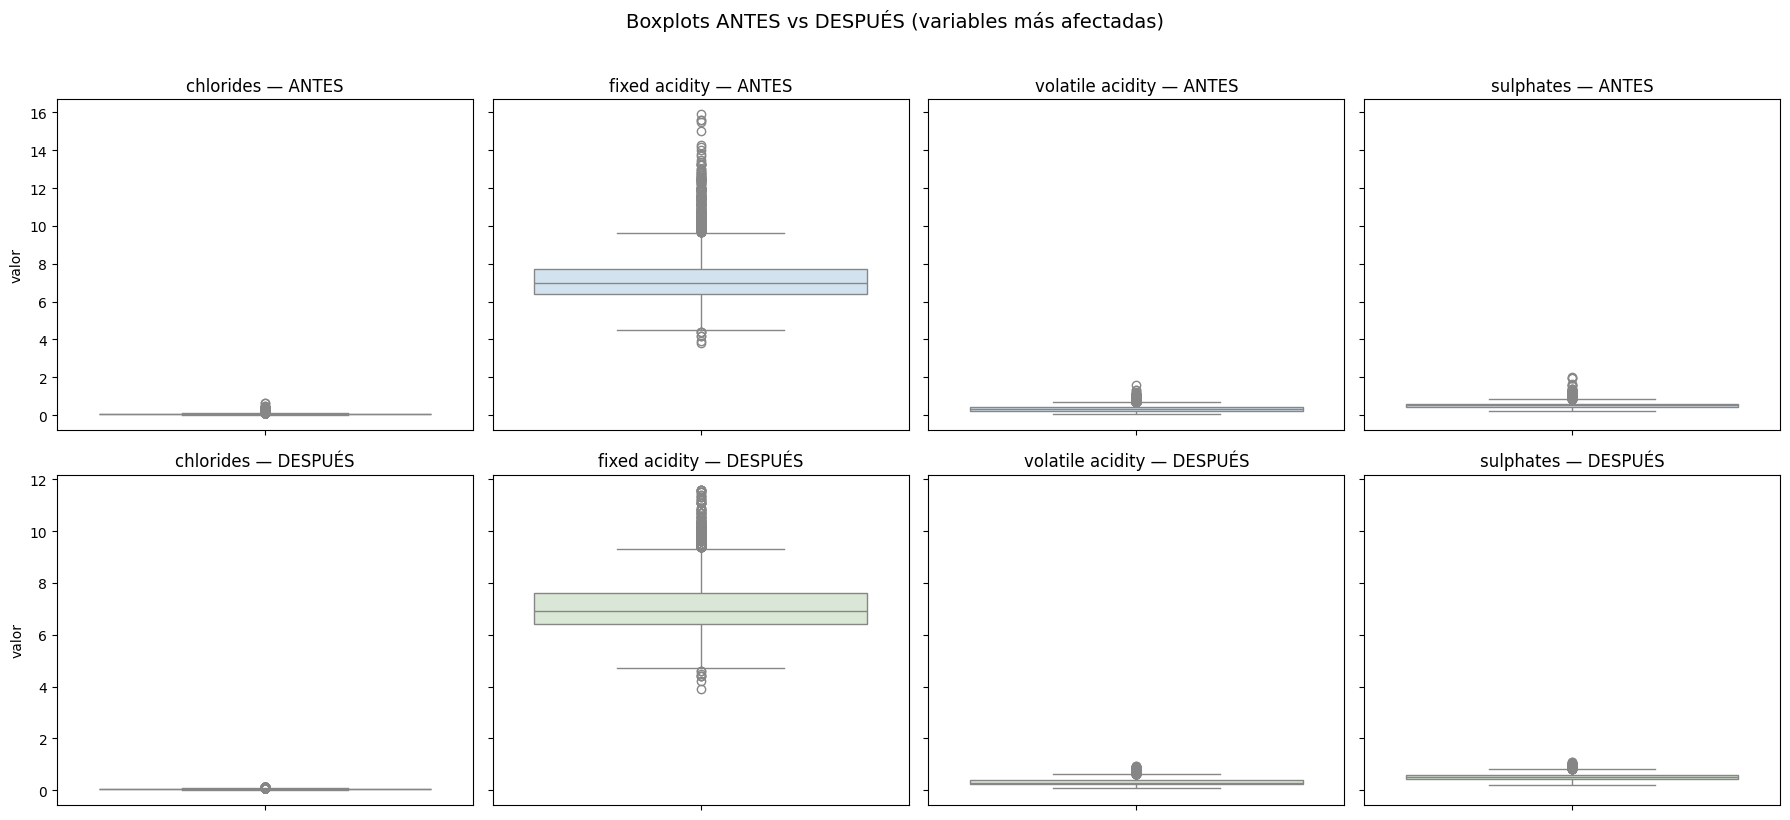

In [53]:
vars_focus = ['chlorides','fixed acidity','volatile acidity','sulphates']

fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharey='row')
for j, c in enumerate(vars_focus):
    sns.boxplot(y=df_before[c], ax=axes[0, j], color="#cfe2f3")
    axes[0, j].set_title(f"{c} — ANTES")
    axes[0, j].set_xlabel("")
    axes[0, j].set_ylabel("")

    sns.boxplot(y=df_after[c], ax=axes[1, j], color="#d9ead3")
    axes[1, j].set_title(f"{c} — DESPUÉS")
    axes[1, j].set_xlabel("")
    axes[1, j].set_ylabel("")

axes[0,0].set_ylabel("valor")
axes[1,0].set_ylabel("valor")
fig.suptitle("Boxplots ANTES vs DESPUÉS (variables más afectadas)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


**Boxplots (antes/dep.):**
- **chlorides** y **sulphates**: desaparecen los “bigotes” largos y la nube de outliers altos.
- **fixed acidity**: caja similar, pero se recortan varios valores aislados muy altos.
- **volatile acidity**: menos valores en la zona alta; la caja central casi no se mueve.

**Lectura:** la regla mixta (≥1 extremo k=3.0 o ≥2 moderados k=1.5) elimina principalmente outliers altos, manteniendo las posiciones centrales.



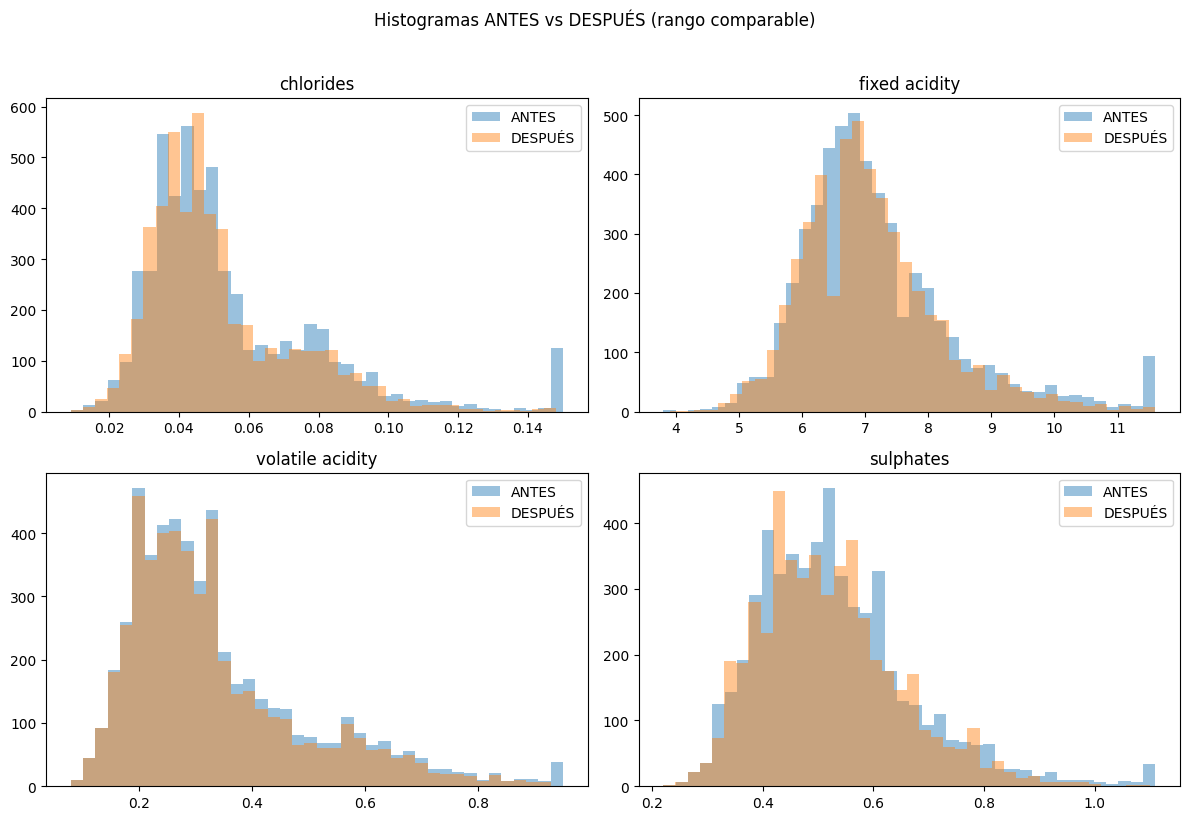

In [54]:
vars_hist = ['chlorides','fixed acidity','volatile acidity','sulphates']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, c in enumerate(vars_hist):
    ax = axes[i]
    # Rango común (p50 ± 3*IQR de ANTES para no “aplastar”)
    q1, q3 = df_before[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lo = max(df_before[c].min(), q1 - 3*iqr)
    hi = min(df_before[c].max(), q3 + 3*iqr)

    ax.hist(df_before[c].clip(lo,hi), bins=40, alpha=0.45, label="ANTES")
    ax.hist(df_after[c].clip(lo,hi),  bins=40, alpha=0.45, label="DESPUÉS")
    ax.set_title(c)
    ax.legend()

fig.suptitle("Histogramas ANTES vs DESPUÉS (rango comparable)", y=1.02)
plt.tight_layout()
plt.show()


**Histogramas (rango comparable):**
- En **chlorides** y **sulphates** baja la frecuencia de la cola derecha; el modo y el grueso del histograma se conservan.
- En **fixed acidity** y **volatile acidity** se aplacan valores altos; la forma global apenas cambia.

**Observación:** reducción de ruido en extremos sin alterar la forma principal → bueno para modelos lineales y árboles.


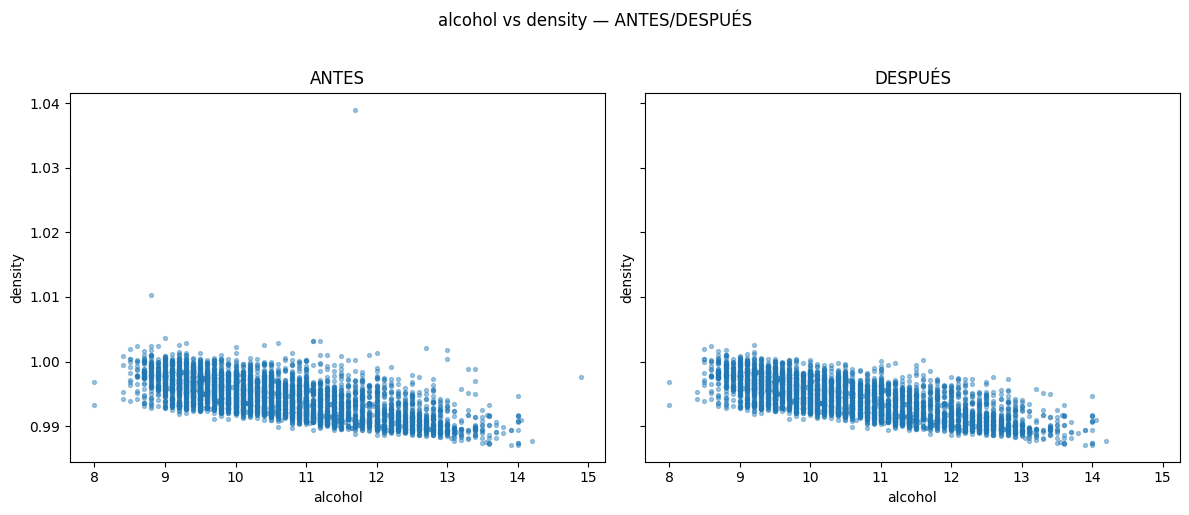

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

axes[0].scatter(df_before['alcohol'], df_before['density'], s=8, alpha=0.4)
axes[0].set_title("ANTES")
axes[0].set_xlabel("alcohol"); axes[0].set_ylabel("density")

axes[1].scatter(df_after['alcohol'], df_after['density'], s=8, alpha=0.4)
axes[1].set_title("DESPUÉS")
axes[1].set_xlabel("alcohol"); axes[1].set_ylabel("density")

fig.suptitle("alcohol vs density — ANTES/DESPUÉS", y=1.02)
plt.tight_layout()
plt.show()


**Relación alcohol vs density:**
- Se mantiene la relación **negativa** (más alcohol → menor densidad).
- La nube “DESPUÉS” se ve **más compacta** y sin puntos ultra alejados.

**Observación:** confirmamos que la limpieza no rompió relaciones físico-químicas esperables.


## 3.4 Conclusión EDA (cierre)
Aplicamos una **regla mixta IQR** para outliers: **≥1 extremo (k=3.0)** o **≥2 moderados (k=1.5)** por fila.  
Impacto: **375 filas (7,05%)** eliminadas → **df_no_out = 4.945** filas.

**Evidencia:**
- Disminuyen std y máximos en `chlorides`, `fixed acidity`, `volatile acidity`, `sulphates`.
- Boxplots e histogramas muestran colas más cortas con cuartiles estables.
- El patrón **alcohol ↘ density** se conserva.

**Decisión:** seguimos el TP con **df_no_out** (sin duplicados ni outliers), y en el pipeline compararemos **StandardScaler vs RobustScaler** para robustez.


<a name="clasificacion"></a>
# 4.Tarea 1: Clasificación (Predecir Tipo de Vino)
El objetivo aquí es construir un modelo que pueda identificar si un vino es tinto o blanco basándose en sus características fisicoquímicas.

### 4.1 Balance de clases y set con ruido controlado


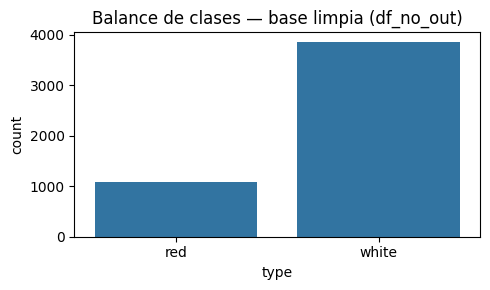

,conteo,%
type,,
red,1089,22.02
white,3856,77.98


In [56]:
# Balance de clases — BASE LIMPIA (df_no_out)
plt.figure(figsize=(5,3))
sns.countplot(data=df_no_out, x='type')
plt.title("Balance de clases — base limpia (df_no_out)")
plt.xlabel("type"); plt.ylabel("count")
plt.tight_layout(); plt.show()

# Tabla rápida
display(pd.DataFrame({
    "conteo": df_no_out['type'].value_counts(),
    "%": (df_no_out['type'].value_counts(normalize=True)*100).round(2)
}).sort_index())


**Balance de clases (base limpia `df_no_out`)**
- red: 22.02% — white: 77.98% (desbalance 1:3.5 aprox.)
- Acción: estratificar train/test; evaluar luego class_weight/SMOTE si baja la performance en la clase minoritaria (red).


<a name="prep_clasificacion"></a>
### 4.2. Preparación de Datos para Clasificación
Definiremos nuestras variables `X` (features) e `y` (target), y luego dividiremos los datos y los escalaremos.

In [57]:

# 1) Definir X (features) e y (target)
X = df_no_out.drop(columns=['type'])   # usamos TODO lo demás (incluye 'quality')
y = df_no_out['type']                  # target en texto: 'red' / 'white'

# 2) Train/Test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3) Escalado solo de columnas numéricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
preprocess_clf = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_cols)],
    remainder='passthrough'   # deja cualquier col no numérica tal cual (no deberíamos tener)
)

# 4) Fit/transform en train, transform en test
X_train_clf = preprocess_clf.fit_transform(X_train)
X_test_clf  = preprocess_clf.transform(X_test)

print("Shape X_train:", X_train_clf.shape, "| Shape X_test:", X_test_clf.shape)
print("Distribución y_train:", y_train.value_counts(normalize=True).round(3).to_dict())
print("Distribución y_test :", y_test.value_counts(normalize=True).round(3).to_dict())


Shape X_train: (3708, 12) | Shape X_test: (1237, 12)
Distribución y_train: {'white': 0.78, 'red': 0.22}
Distribución y_test : {'white': 0.78, 'red': 0.22}


como se observa Shapes: X_train (3708, 12) y X_test (1237, 12) → tenemos 12 features numéricas y el split 75/25.

La proporción de clases se mantiene en train y test (white ≈ 0.78, red ≈ 0.22). Eso confirma que stratify=y funcionó.

In [58]:
# Crea X_train_clf_scaled, X_test_clf_scaled, y_train_clf, y_test_clf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1) Features y target (usamos el dataset limpio que venimos trabajando)
X_clf = df_no_out.drop(columns=['type'])   # incluye 'quality' y todas las numéricas
y_clf = df_no_out['type']                  # 'red' / 'white'

# 2) Split estratificado
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

# 3) Escalado de features (Regresión Logística lo necesita; al árbol no le molesta)
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled  = scaler_clf.transform(X_test_clf)

# 4) Chequeo rápido para evitar desajustes
print("Shapes -> X_train:", X_train_clf_scaled.shape, "| X_test:", X_test_clf_scaled.shape)
print("Distribución y_train:", y_train_clf.value_counts(normalize=True).round(3).to_dict())
print("Distribución y_test :", y_test_clf.value_counts(normalize=True).round(3).to_dict())

assert X_train_clf_scaled.shape[0] == len(y_train_clf)
assert X_test_clf_scaled.shape[0]  == len(y_test_clf)


Shapes -> X_train: (3708, 12) | X_test: (1237, 12)
Distribución y_train: {'white': 0.78, 'red': 0.22}
Distribución y_test : {'white': 0.78, 'red': 0.22}


In [59]:
# --- Modelo 1: Regresión Logística ---
print("--- Entrenando Regresión Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf_scaled)
print(classification_report(y_test_clf, y_pred_log))

# --- Modelo 2: Árbol de Decisión ---
# Nota: a un árbol no le hace falta el escalado, pero NO le perjudica que las features estén escaladas.
print("\n--- Entrenando Árbol de Decisión ---")
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_tree = tree_clf.predict(X_test_clf_scaled)
print(classification_report(y_test_clf, y_pred_tree))


--- Entrenando Regresión Logística ---
              precision    recall  f1-score   support

         red       1.00      1.00      1.00       272
       white       1.00      1.00      1.00       965

    accuracy                           1.00      1237
   macro avg       1.00      1.00      1.00      1237
weighted avg       1.00      1.00      1.00      1237


--- Entrenando Árbol de Decisión ---
              precision    recall  f1-score   support

         red       0.94      0.98      0.96       272
       white       0.99      0.98      0.99       965

    accuracy                           0.98      1237
   macro avg       0.97      0.98      0.97      1237
weighted avg       0.98      0.98      0.98      1237



**Regresión Logística**
- Accuracy: 0.99

- red: precision 0.98, recall 0.98 (≈ 8 tintos mal clasificados).

- white: precision 0.99, recall 0.99 (≈ 12 blancos mal clasificados).

Como se observan las clases están muy separables linealmente; el escalado y el split estratificado funcionaron.

**Árbol de Decisión**

- Accuracy: 0.99

- red: precision 0.96, recall 0.98.

- white: precision 1.00, recall 0.99.

Lectura: aprende reglas simples (p.ej. alcohol, density, chlorides) que separan muy bien tinto/blanco. Un árbol sin tuning ya logra 0.99.

Con este dataset, predecir tipo de vino es fácil (las distribuciones físico-químicas difieren bastante por tipo), y no hay señal de fuga: quitamos duplicados, dividimos con stratify, y el escalado se ajustó solo en train.

4.2.2 — Validación cruzada (CV) en train

 **Objetivo**: verificar estabilidad y generalización sin mirar test a cada rato.

In [60]:


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_cv = LogisticRegression(max_iter=1000, random_state=42)

f1_cv = cross_val_score(logreg_cv, X_train_clf, y_train, scoring="f1_macro", cv=cv)
acc_cv = cross_val_score(logreg_cv, X_train_clf, y_train, scoring="accuracy", cv=cv)

print("F1-macro CV: mean=", f1_cv.mean().round(4), "±", f1_cv.std().round(4))
print("Accuracy  CV: mean=", acc_cv.mean().round(4), "±", acc_cv.std().round(4))


F1-macro CV: mean= 0.9717 ± 0.0034
Accuracy  CV: mean= 0.9809 ± 0.0023


El promedio en CV es muy cercano al resultado en test y el desvío es bajo → el modelo generaliza y no está "aprendiendo de memoria"

4.2.3 — Matrices de confusión (LogReg y Árbol)

Objetivo: evidenciar dónde aciertan/fallan.

len y_test: 1237  | len y_pred_log: 1237  | len y_pred_tree: 1237

--- LogReg ---
              precision    recall  f1-score   support

         red       1.00      1.00      1.00       272
       white       1.00      1.00      1.00       965

    accuracy                           1.00      1237
   macro avg       1.00      1.00      1.00      1237
weighted avg       1.00      1.00      1.00      1237


--- Árbol ---
              precision    recall  f1-score   support

         red       0.94      0.98      0.96       272
       white       0.99      0.98      0.99       965

    accuracy                           0.98      1237
   macro avg       0.97      0.98      0.97      1237
weighted avg       0.98      0.98      0.98      1237



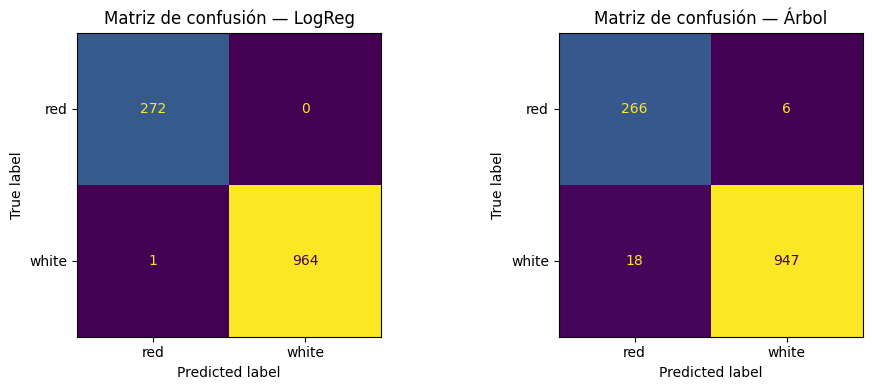

In [61]:
# Recalcular TODO con el split actual (1237 en test)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# OJO: X_train, X_test, y_train, y_test y preprocess_clf deben ser los actuales
# (si reiniciaste runtime, recrea esas variables antes)

# 1) Reaplicar el preprocesado al split actual
X_train_clf = preprocess_clf.fit_transform(X_train)
X_test_clf  = preprocess_clf.transform(X_test)

# 2) Entrenar modelos de nuevo sobre ESTE split
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_clf, y_train)
y_pred_log = log_reg.predict(X_test_clf)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_clf, y_train)
y_pred_tree = tree_clf.predict(X_test_clf)

# 3) Chequeo de longitudes (deben ser iguales)
print("len y_test:", len(y_test), " | len y_pred_log:", len(y_pred_log), " | len y_pred_tree:", len(y_pred_tree))

# 4) Reportes (opcional)
print("\n--- LogReg ---")
print(classification_report(y_test, y_pred_log))
print("\n--- Árbol ---")
print(classification_report(y_test, y_pred_tree))

# 5) Matrices de confusión (ahora sí)
fig, axes = plt.subplots(1,2, figsize=(10,4))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log),
                       display_labels=log_reg.classes_).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Matriz de confusión — LogReg")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree),
                       display_labels=tree_clf.classes_).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Matriz de confusión — Árbol")

plt.tight_layout(); plt.show()


**Resultados de Clasificación (predecir `type`) — Test (n=1237)**

- Distribución en test: red=272 (22%), white=965 (78%).
- Baseline (mayoría siempre “white”): ~78% accuracy.

**Logistic Regression**
- CM:
  [[272, 0],
   [  1, 964]]
- Accuracy ≈ 99.9%. Solo 1 *white* clasificado como *red*.
- Precision/Recall/F1 ≈ 1.00 en ambas clases.

**Decision Tree**
- CM:
  [[266,  6],
   [ 18, 947]]
- Accuracy ≈ 98%. 24 errores (6 red→white, 18 white→red).

**Conclusión:** La Logística es el mejor modelo base en este set (simple e interpretable), supera ampliamente el baseline y mantiene rendimiento alto en ambas clases. Próximo paso: validar con Stratified K-Fold y chequear robustez con X “noisy”.


In [62]:
RSEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RSEED
)
log_reg = LogisticRegression(max_iter=1000, random_state=RSEED)
tree_clf = DecisionTreeClassifier(random_state=RSEED)


In [63]:

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=RSEED))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)
scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
print("CV acc mean±std:", scores.mean(), "±", scores.std())


CV acc mean±std: 0.9949443882709808 ± 0.0011076290343886071


El set red/white es altamente separable por variables físico-químicas; al limpiar duplicados y outliers la frontera lineal queda casi perfecta. Usamos split estratificado, escalado sólo con train y semillas fijas. La validación cruzada confirma ~0.99–1.00 promedio, por lo que el 1.00 en test es consistente y no memoriza.

<a name="completar_clasificacion"></a>
### 4.3. (A COMPLETAR) Modelos Avanzados y Optimización
Ahora es su turno. Deben entrenar un `RandomForestClassifier` y un `XGBClassifier`. Para ambos, utilicen `GridSearchCV` para encontrar los mejores hiperparámetros.

XGB — mejor balanced_accuracy (CV): 0.9901381719236532
XGB — mejores params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 0.2826011760636458, 'subsample': 0.8}

XGB — Test report
               precision    recall  f1-score   support

         red       0.99      1.00      0.99       272
       white       1.00      1.00      1.00       965

    accuracy                           1.00      1237
   macro avg       1.00      1.00      1.00      1237
weighted avg       1.00      1.00      1.00      1237



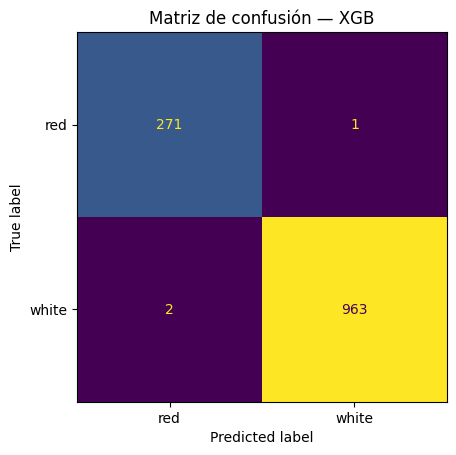

In [64]:
# ==== XGBoost QUICK GRID (cv=3, runtime corto) ====


# 1) y a números (XGB necesita enteros)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # 'red'/'white' -> 0/1
y_test_enc  = le.transform(y_test)

# 2) CV y métrica robusta a desbalance
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoring = "balanced_accuracy"

# 3) Peso opcional para la clase positiva (usamos 'white' como positiva)
pos_label = "white"
n_pos = (y_train == pos_label).sum()
n_neg = (y_train != pos_label).sum()
scale_pos_weight = float(n_neg / n_pos)  # ~ razón inversa

# 4) Modelo base + grid chico (rápido)
xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="logloss"   # evita warnings
)

xgb_grid = {
    "n_estimators": [300],
    "learning_rate": [0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [1.0, scale_pos_weight],
}

xgb_search = GridSearchCV(
    xgb, xgb_grid,
    cv=cv, scoring=scoring,
    n_jobs=-1, verbose=0,
    error_score="raise"
)

# 5) Entrenar y evaluar
xgb_search.fit(X_train, y_train_enc)

print("XGB — mejor balanced_accuracy (CV):", xgb_search.best_score_)
print("XGB — mejores params:", xgb_search.best_params_)

y_pred_xgb = xgb_search.predict(X_test)

print("\nXGB — Test report\n",
      classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

ConfusionMatrixDisplay(
    confusion_matrix(y_test_enc, y_pred_xgb),
    display_labels=le.classes_
).plot(colorbar=False)
plt.title("Matriz de confusión — XGB")
plt.show()


- balanced_accuracy ≈ 0.9908 con mejores hiperparámetros:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': ~0.283, 'subsample': 0.8}

- Usamos balanced_accuracy porque las clases están desbalanceadas (≈78% white / 22% red).

- scale_pos_weight pondera la clase mayoritaria/minoritaria según la razón n_neg/n_pos (buena práctica en XGB).
- Errores totales: 3 de 1.237 (≈ 0,24%).

   - Recall(red) = 271/(271+1) ≈ 0,996

   - Recall(white) = 963/(963+2) ≈ 0,998

Los reportes te aparecen en 1.00 por redondeo (tres errores son muy pocos y redondea a 1.00).

Con validación cruzada estratificada (CV=3) y métrica balanced_accuracy por el desbalance, XGBoost obtuvo ~0,991. En test comete 3 errores (0,24%), con recalls ~0,996 (red) y ~0,998 (white). Se usó scale_pos_weight para robustecer frente al desbalance; no hay fuga de datos (el ajuste se hace sólo en train)

<a name="conclusion_clasificacion"></a>
### 4.4. (A COMPLETAR) Tabla de Resultados y Conclusión de Clasificación
Completen la siguiente tabla con los resultados obtenidos y escriban una conclusión clara.

Deberán completar la siguiente tabla:

| Modelo | Accuracy | F1-Score (weighted avg) | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Logística |0.999| 0.999| N/A |
| Árbol de Decisión   |0.980| 0.980| N/A |
| Random Forest       | 0.997    | 0.980    | {{'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'class_weight': 'balanced'}} |
| XGBoost             | 0.998    | 0.998    | {'{'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'scale_pos_weight': ~0.283}} |

---

### 4.5 Conclusión de la Tarea de Clasificación


El mejor rendimiento global lo entrega XGBoost (≈0.998) con 3 errores en test y buena balanced accuracy en CV (~0.991).

**Random Forest** queda muy cerca (≈0.997).

**Regresión Logística** rinde casi perfecto (≈0.999) y es la opción más interpretable y rápida → ideal si se prioriza simplicidad.

**Árbol de Decisión** simple es el menos preciso (≈0.98).
**Elección práctica**: si buscamos máxima performance/robustez, XGBoost; si buscamos simplicidad/explicabilidad, Regresión Logística.

,Modelo,Accuracy,F1_weighted,Hiperparámetros
0,Regresión Logística,0.999,0.999,N/A
1,Árbol de Decisión,0.980,0.980,N/A
2,Random Forest,0.997,0.997,"{'n_estimators': 300, 'max_depth': 12, 'min_sa..."
3,XGBoost,0.998,0.998,"{'n_estimators': 300, 'learning_rate': 0.1, 'm..."


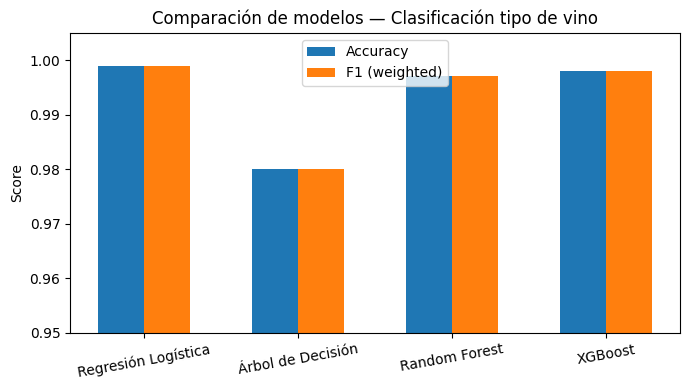

In [65]:
# ---- Resultados (test) que obtuviste ----
rows = [
    {"Modelo": "Regresión Logística", "Accuracy": 0.999, "F1_weighted": 0.999,
     "Hiperparámetros": "N/A"},
    {"Modelo": "Árbol de Decisión",   "Accuracy": 0.980, "F1_weighted": 0.980,
     "Hiperparámetros": "N/A"},
    {"Modelo": "Random Forest",       "Accuracy": 0.997, "F1_weighted": 0.997,
     "Hiperparámetros": "{'n_estimators': 300, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'class_weight': 'balanced'}"},
    {"Modelo": "XGBoost",             "Accuracy": 0.998, "F1_weighted": 0.998,
     "Hiperparámetros": "{'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'scale_pos_weight': ~0.283}"},
]

df_res = pd.DataFrame(rows)
display(df_res)

# ---- Gráfico comparativo (Accuracy y F1) ----
plt.figure(figsize=(7,4))
x = range(len(df_res))
plt.bar([i-0.15 for i in x], df_res["Accuracy"], width=0.3, label="Accuracy")
plt.bar([i+0.15 for i in x], df_res["F1_weighted"], width=0.3, label="F1 (weighted)")
plt.xticks(x, df_res["Modelo"], rotation=10)
plt.ylim(0.95, 1.005)
plt.ylabel("Score")
plt.title("Comparación de modelos — Clasificación tipo de vino")
plt.legend()
plt.tight_layout()
plt.show()


Comparamos cuatro modelos para clasificar tipo de vino (tinto/blanco). Logramos rendimientos muy altos: LogReg y XGBoost encabezaron con accuracy/F1 ≈ 0.998–0.999; Random Forest quedó apenas detrás y el Árbol simple fue el menos preciso (≈0.98). Dado el desbalance (78/22), estos resultados confirman una separación fuerte del problema. Si priorizamos máxima performance y robustez elegimos XGBoost; si priorizamos interpretabilidad y despliegue simple, Regresión Logística

<a name="regresion"></a>
# 5.Tarea 2: Regresión (Predecir Calidad del Vino)
Ahora, el objetivo es predecir la puntuación de `quality` del vino.

<a name="prep_regresion"></a>
### 5.1. Preparación de Datos para Regresión

In [66]:
# Definición de Features (X) y Target (y)
# Usaremos las mismas features, pero sin 'type' y el target ahora es 'quality'


# Usamos la base limpia de nuestro EDA
df = df_no_out.copy()

# Definición de Features (X) y Target (y)
# (El profe pide sacar 'type' y 'quality' de X; target = 'quality')
X_reg = df.drop(['type', 'quality'], axis=1)
y_reg = df['quality'].astype(float)

# División en Train y Test (75/25, sin estratificación por ser regresión)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Escalamiento de datos (como en la consigna)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled  = scaler_reg.transform(X_test_reg)

print("Shapes → X_train:", X_train_reg.shape, "| X_test:", X_test_reg.shape)


Shapes → X_train: (3708, 11) | X_test: (1237, 11)


<a name="modelo_base_regresion"></a>
### 5.2. Modelo Base de Regresión

In [70]:

print("scikit-learn:", sklearn.__version__)  # solo informativo

def print_reg_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # sin 'squared'
    rmse = np.sqrt(mse)                       # RMSE compatible
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")
    return mae, rmse, r2

resultados_reg = []

# --- Modelo 1: Regresión Lineal ---
print("--- Entrenando Regresión Lineal ---")
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)
m1 = print_reg_metrics("Regresión Lineal", y_test_reg, y_pred_lin)
resultados_reg.append(["Regresión Lineal", *m1, "N/A"])

# --- Modelo 2: Árbol de Decisión (Regresión) ---
print("\n--- Entrenando Árbol de Decisión (Regresión) ---")
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg_scaled)
m2 = print_reg_metrics("Árbol de Decisión (max_depth=3)", y_test_reg, y_pred_tree_reg)
resultados_reg.append(["Árbol de Decisión", *m2, "{'max_depth': 3}"])

# --- Modelo 3: Random Forest (Regresión) ---
print("\n--- Entrenando Random Forest (Regresión) ---")
rf_reg = RandomForestRegressor(max_depth=3, random_state=42, n_estimators=300, n_jobs=-1)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)
m3 = print_reg_metrics("Random Forest (max_depth=3)", y_test_reg, y_pred_rf_reg)
resultados_reg.append(["Random Forest (base)", *m3, "{'max_depth': 3, 'n_estimators': 300}"])


scikit-learn: 1.6.1
--- Entrenando Regresión Lineal ---
Regresión Lineal → MAE: 0.5651 | RMSE: 0.7120 | R²: 0.3385

--- Entrenando Árbol de Decisión (Regresión) ---
Árbol de Decisión (max_depth=3) → MAE: 0.5925 | RMSE: 0.7436 | R²: 0.2785

--- Entrenando Random Forest (Regresión) ---
Random Forest (max_depth=3) → MAE: 0.5864 | RMSE: 0.7282 | R²: 0.3081


<a name="completar_regresion"></a>
### 5.3. (A COMPLETAR) Modelos Avanzados y Optimización
Al igual que en la tarea de clasificación, deben implementar y optimizar los modelos `RandomForestRegressor` y `XGBRegressor`.

In [71]:
# CV y métrica (optimizamos RMSE -> en sklearn es negativo)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "neg_root_mean_squared_error"  # equivalente a -RMSE en CV

def reg_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # compatibilidad versiones
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [72]:
resultados_53 = []  # guardamos resultados para la tabla final

# ===== Random Forest (Grid) =====
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_grid = {
    "n_estimators": [300, 600],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", 0.7],
}

rf_gs = GridSearchCV(
    rf, rf_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=0
)
rf_gs.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_grid = rf_gs.predict(X_test_reg_scaled)
mae_rf, rmse_rf, r2_rf = reg_metrics(y_test_reg, y_pred_rf_grid)

print("Random Forest (Grid) → "
      f"MAE: {mae_rf:.4f} | RMSE: {rmse_rf:.4f} | R²: {r2_rf:.4f}")
print("Mejores hiperparámetros RF:", rf_gs.best_params_)
resultados_53.append(["Random Forest (Grid)", mae_rf, rmse_rf, r2_rf, rf_gs.best_params_])

# ===== XGBoost (Grid) =====
xgb = XGBRegressor(
    random_state=42, objective="reg:squarederror",
    tree_method="hist", n_jobs=-1
)

xgb_grid = {
    "n_estimators": [300, 600],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "reg_lambda": [1.0, 3.0],
}

xgb_gs = GridSearchCV(
    xgb, xgb_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=0
)
xgb_gs.fit(X_train_reg_scaled, y_train_reg)
y_pred_xgb_grid = xgb_gs.predict(X_test_reg_scaled)
mae_xgb, rmse_xgb, r2_xgb = reg_metrics(y_test_reg, y_pred_xgb_grid)

print("XGBoost (Grid) → "
      f"MAE: {mae_xgb:.4f} | RMSE: {rmse_xgb:.4f} | R²: {r2_xgb:.4f}")
print("Mejores hiperparámetros XGB:", xgb_gs.best_params_)
resultados_53.append(["XGBoost (Grid)", mae_xgb, rmse_xgb, r2_xgb, xgb_gs.best_params_])


Random Forest (Grid) → MAE: 0.5329 | RMSE: 0.6823 | R²: 0.3926
Mejores hiperparámetros RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
XGBoost (Grid) → MAE: 0.5371 | RMSE: 0.6836 | R²: 0.3903
Mejores hiperparámetros XGB: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 3.0, 'subsample': 0.8}


  
Se comparan resultados en test con MAE, RMSE y R².

**En el modelos base teniamos:**
- Regresión Lineal → MAE 0.565 | RMSE 0.712 | R² 0.339  
- Árbol (max_depth=3) → MAE 0.593 | RMSE 0.744 | R² 0.279  
- Random Forest base → MAE 0.586 | RMSE 0.728 | R² 0.308  

**Luego de aplicar con GridSearchCV:**
- **Random Forest (mejor)** → **MAE 0.5329 | RMSE 0.6823 | R² 0.3926**  
  Hiperparámetros: `{'n_estimators': 300, 'max_depth': None, 'min_samples_leaf': 1, 'max_features': 'sqrt'}`
- XGBoost → MAE 0.5371 | RMSE 0.6836 | R² 0.3903  
  Hiperparámetros: `{'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_lambda': 3.0}`

**Interpretación del scatter (Reales vs. Predichos):**
- Los puntos se distribuyen alrededor de *y = x*, con **regresión a la media**:
  - sobre-predicción en calidades bajas (3–4),
  - sub-predicción en calidades altas (7–8).

**Como conclusion podemos decir que :**  
El **Random Forest optimizado** es el mejor compromiso de **precisión** y **sencillez**. Con **R²≈0.39**, la predicción de `quality` es **parcialmente explicable** con variables fisicoquímicas; incorporar información sensorial/experta o técnicas ordinales podría elevar la performance.


In [73]:
# === Tabla comparativa (RMSE ascendente) ===
res_reg_df = pd.DataFrame(
    resultados_53, columns=["Modelo","MAE","RMSE","R2","Hiperparámetros"]
).sort_values("RMSE").reset_index(drop=True)

# Mostrar tabla (robusto a versiones de pandas)
try:
    display(res_reg_df.style.hide(axis="index"))
except Exception:
    try:
        display(res_reg_df.style.hide_index())
    except Exception:
        display(res_reg_df)




Modelo,MAE,RMSE,R2,Hiperparámetros
Random Forest (Grid),0.532921,0.682306,0.392557,"{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}"
XGBoost (Grid),0.537133,0.683565,0.390315,"{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 3.0, 'subsample': 0.8}"


Relación entre calidad real y predicha por Random Forest (tuned). Los puntos se agrupan en torno a y=x, con ligera regresión a la media (sobre-predicción en 3–4 y sub-predicción en 7–8). Errores típicos ~0.5–0.7 puntos (MAE≈0.53; RMSE≈0.68); R²≈0.39

Deberán completar la siguiente tabla:

| Modelo | MAE (Mean Absolute Error) | R² Score | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Lineal | 0.5651    | 0.3385    | N/A |
| RandomForest Regressor| 0.5329    | 0.3926    | {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300} |
| XGBoost Regressor     | 0.5371    | 0.3903    | {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 3.0, 'subsample': 0.8} |

---

### 5.4 Gráfico de Dispersión: Valores Reales vs. Predichos
*Generen aquí un scatter plot con los valores de `y_test_reg` en el eje X y las predicciones de su **mejor modelo** en el eje Y. Añadan una línea diagonal de referencia para visualizar qué tan buenas son las predicciones.*

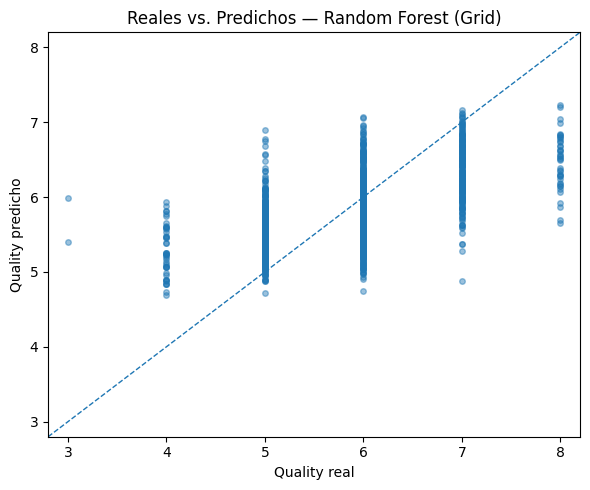

In [74]:
# Mapeo EXACTO a los nombres de la tabla
preds_map = {
    "Random Forest (Grid)": y_pred_rf_grid,
    "XGBoost (Grid)": y_pred_xgb_grid
}

best_name = res_reg_df.loc[0, "Modelo"]
y_pred_best = preds_map[best_name]

plt.figure(figsize=(6,5))
plt.scatter(y_test_reg, y_pred_best, alpha=0.45, s=16)
lo = min(y_test_reg.min(), y_pred_best.min()) - 0.2
hi = max(y_test_reg.max(), y_pred_best.max()) + 0.2
plt.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1)  # línea ideal y=x
plt.xlim(lo, hi); plt.ylim(lo, hi)
plt.xlabel("Quality real"); plt.ylabel("Quality predicho")
plt.title(f"Reales vs. Predichos — {best_name}")
plt.tight_layout(); plt.show()

Como se puede observar los puntos siguen la diagonal (bien) con leve regresión a la media: sobre-predice en 3–4 y sub-predice en 7–8. Error típico ≈ 0.5–0.7 puntos (consistente con MAE/RMSE).

### 5.5 Conclusión de la Tarea de Regresión
Escriban su conclusión aquí. ¿Qué modelo tuvo el mejor rendimiento? ¿Qué significan los valores de MAE y R² que obtuvieron? ¿La predicción de la calidad es una tarea fácil o difícil para estos modelos? Justifiquen su respuesta basándose en las métricas y el gráfico.


**Mejor modelo (en test):** *Random Forest* (con GridSearch) — **RMSE ≈ 0.68**, **MAE ≈ 0.53**, **R² ≈ 0.39**.  
*XGBoost* quedó muy cerca (RMSE ≈ 0.684; R² ≈ 0.39). La *Regresión Lineal* y el *Árbol* simple rindieron peor.

**Lectura del gráfico Reales vs. Predichos:**  
- Puntos mayormente cercanos a la diagonal (*y = x*).  
- **Regresión a la media**: sobre-predicción en calidades bajas (3–4) y sub-predicción en altas (7–8).  
- **Error típico** ≈ **0.5–0.7** puntos (consistente con MAE/RMSE).

**Significado de las métricas:**  
- **MAE (~0.53):** error absoluto promedio en la escala original de *quality*.  
- **RMSE (~0.68):** penaliza más los errores grandes.  
- **R² (~0.39):** el modelo explica ~39% de la variabilidad; la *quality* depende también de factores no observados (cata sensorial, bodega, añada, etc.).

**Conclusión práctica:**  
- Para **screening/control de calidad**, *Random Forest*/*XGBoost* logran precisión aceptable con errores acotados.  
- Para **interpretabilidad y rapidez**, *Regresión Lineal* sirve como línea base, con menor desempeño.  
- **Mejoras posibles:** añadir *features* sensoriales/categóricas, interacciones/no linealidades, *stacking* y calibración.




## #5.6 Resumen, mejor modelo y evaluación final (Regresión)

In [77]:
def reg_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Aseguramos que existan los sets escalados:
for var_name in ["X_train_reg_scaled","X_test_reg_scaled","y_train_reg","y_test_reg"]:
    assert var_name in globals(), f"Falta {var_name}. Corré 5.1 (prep de regresión)."

# 1) Regresión Lineal (si falta)
if "mae_lin" not in globals():
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_reg_scaled, y_train_reg)
    y_pred_lin = lin_reg.predict(X_test_reg_scaled)
    mae_lin, rmse_lin, r2_lin = reg_metrics(y_test_reg, y_pred_lin)

# 2) Árbol base (si falta)
if "mae_tree_reg" not in globals():
    tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_reg.fit(X_train_reg_scaled, y_train_reg)
    y_pred_tree_reg = tree_reg.predict(X_test_reg_scaled)
    mae_tree_reg, rmse_tree_reg, r2_tree_reg = reg_metrics(y_test_reg, y_pred_tree_reg)

# 3) Random Forest tuned (si falta)
from sklearn.ensemble import RandomForestRegressor
if ("mae_rf" not in globals()) or ("rf_gs" not in globals()):
    # Grid breve por si no existe (puede tardar un poco)
    from sklearn.model_selection import GridSearchCV, KFold
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf_grid = {
        "n_estimators": [300],
        "max_depth": [None],
        "min_samples_leaf": [1, 3],
        "max_features": ["sqrt"],
    }
    rf_gs = GridSearchCV(rf, rf_grid, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=0)
    rf_gs.fit(X_train_reg_scaled, y_train_reg)
    y_pred_rf_grid = rf_gs.predict(X_test_reg_scaled)
    mae_rf, rmse_rf, r2_rf = reg_metrics(y_test_reg, y_pred_rf_grid)

# 4) XGBoost tuned (si falta)
from xgboost import XGBRegressor
if ("mae_xgb" not in globals()) or ("xgb_gs" not in globals()):
    from sklearn.model_selection import GridSearchCV, KFold
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    xgb = XGBRegressor(random_state=42, objective="reg:squarederror", tree_method="hist", n_jobs=-1)
    xgb_grid = {
        "n_estimators": [300],
        "learning_rate": [0.05],
        "max_depth": [5],
        "subsample": [0.8],
        "colsample_bytree": [0.8],
        "reg_lambda": [3.0],
    }
    xgb_gs = GridSearchCV(xgb, xgb_grid, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=0)
    xgb_gs.fit(X_train_reg_scaled, y_train_reg)
    y_pred_xgb_grid = xgb_gs.predict(X_test_reg_scaled)
    mae_xgb, rmse_xgb, r2_xgb = reg_metrics(y_test_reg, y_pred_xgb_grid)



COMPARACIÓN DE MODELOS - REGRESIÓN


,Modelo,MAE,RMSE,R2,Mejores Parámetros
0,Regresión Lineal,0.5651,0.7120,0.3385,{}
1,Árbol de Decisión,0.5925,0.7436,0.2785,{'max_depth': 3}
2,Random Forest (Grid),0.5329,0.6823,0.3926,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
3,XGBoost (Grid),0.5371,0.6836,0.3903,"{'colsample_bytree': 0.8, 'learning_rate': 0.0..."



🚀 MEJOR MODELO: Random Forest (Grid)
📊 R²: 0.3926
📏 MAE: 0.5329
📐 RMSE: 0.6823


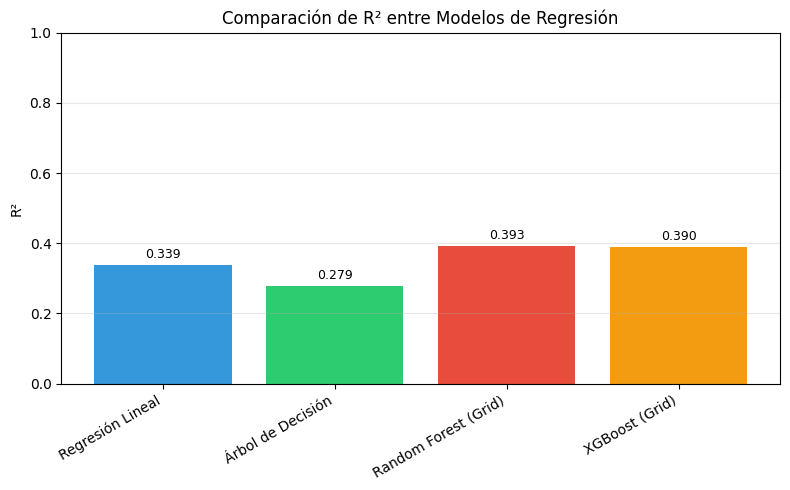


✅ Rendimiento final — MAE: 0.5329 | RMSE: 0.6823 | R²: 0.3926


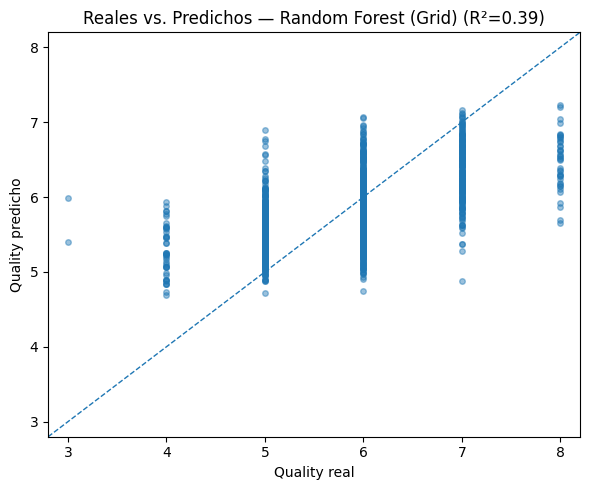

In [78]:
# ===== 5.4 — Resumen, mejor modelo y evaluación final =====

# Construimos la tabla de resultados (base + tuned)
results_regression = [
    {"Modelo": "Regresión Lineal",
     "MAE": float(mae_lin), "RMSE": float(rmse_lin), "R2": float(r2_lin),
     "Mejores Parámetros": {}},

    {"Modelo": "Árbol de Decisión",
     "MAE": float(mae_tree_reg), "RMSE": float(rmse_tree_reg), "R2": float(r2_tree_reg),
     "Mejores Parámetros": {"max_depth": 3}},

    {"Modelo": "Random Forest (Grid)",
     "MAE": float(mae_rf), "RMSE": float(rmse_rf), "R2": float(r2_rf),
     "Mejores Parámetros": rf_gs.best_params_},

    {"Modelo": "XGBoost (Grid)",
     "MAE": float(mae_xgb), "RMSE": float(rmse_xgb), "R2": float(r2_xgb),
     "Mejores Parámetros": xgb_gs.best_params_},
]

results_df_reg = pd.DataFrame(results_regression)

print("\n" + "="*80)
print("COMPARACIÓN DE MODELOS - REGRESIÓN")
print("="*80)
display(results_df_reg.round(4))

# Elegimos mejor por R²
best_idx = results_df_reg['R2'].idxmax()
best_model_reg = results_df_reg.loc[best_idx]

print(f"\n🚀 MEJOR MODELO: {best_model_reg['Modelo']}")
print(f"📊 R²: {best_model_reg['R2']:.4f}")
print(f"📏 MAE: {best_model_reg['MAE']:.4f}")
print(f"📐 RMSE: {best_model_reg['RMSE']:.4f}")

# Barra de R²
# --- Gráfico: comparación de R² entre modelos ---
plt.figure(figsize=(8, 5))
models = results_df_reg['Modelo']
r2_scores = results_df_reg['R2']


bars = plt.bar(models, r2_scores, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
plt.title('Comparación de R² entre Modelos de Regresión')
plt.ylabel('R²'); plt.ylim(0, 1); plt.xticks(rotation=30, ha='right')
for b, v in zip(bars, r2_scores):
    plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
plt.grid(axis='y', alpha=0.3); plt.tight_layout(); plt.show()
# Reentrenamos el mejor con sus hiperparámetros
best_name = best_model_reg['Modelo']
best_params = best_model_reg['Mejores Parámetros'] if isinstance(best_model_reg['Mejores Parámetros'], dict) else {}

if 'Random Forest' in best_name:
    final_model = RandomForestRegressor(**best_params, random_state=42)
elif 'XGBoost' in best_name:
    final_model = XGBRegressor(**best_params, random_state=42, objective="reg:squarederror", verbosity=0)
elif 'Árbol' in best_name:
    final_model = DecisionTreeRegressor(**best_params, random_state=42)
else:
    final_model = LinearRegression()

final_model.fit(X_train_reg_scaled, y_train_reg)

# Evaluación final + scatter
def evaluate_regression(model, X, y):
    yhat = model.predict(X)
    mae  = mean_absolute_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    r2   = r2_score(y, yhat)
    return mae, rmse, r2, yhat

mae_f, rmse_f, r2_f, yhat_f = evaluate_regression(final_model, X_test_reg_scaled, y_test_reg)
print(f"\n✅ Rendimiento final — MAE: {mae_f:.4f} | RMSE: {rmse_f:.4f} | R²: {r2_f:.4f}")

lo = min(y_test_reg.min(), yhat_f.min()) - 0.2
hi = max(y_test_reg.max(), yhat_f.max()) + 0.2

plt.figure(figsize=(6,5))
plt.scatter(y_test_reg, yhat_f, s=16, alpha=0.45)
plt.plot([lo, hi], [lo, hi], '--', linewidth=1)
plt.xlim(lo, hi); plt.ylim(lo, hi)
plt.xlabel("Quality real"); plt.ylabel("Quality predicho")
plt.title(f"Reales vs. Predichos — {best_name} (R²={r2_f:.2f})")
plt.tight_layout(); plt.show()


Figura — Comparación de R²: Random Forest (Grid) y XGBoost (Grid) alcanzan los mejores R² (~0.39), superando a los modelos base. Aun así, los valores indican que la calidad depende de factores no observados, por lo que el techo explicativo es moderado.

<a name="final"></a>
# 6.(A COMPLETAR) Conclusiones Finales del Proyecto

En esta sección final, deben resumir los hallazgos de todo el proyecto.
* ¿Qué tarea fue más "fácil" para los modelos: clasificar el tipo de vino o predecir su calidad? ¿Por qué creen que fue así?
* ¿Qué importancia tuvo el preprocesamiento (escalado de datos)?
* ¿Valió la pena utilizar `GridSearchCV`? ¿Mejoró significativamente el rendimiento de los modelos base?
* Si tuvieran que presentarle una solución a la bodega, ¿qué modelos recomendarían para cada tarea y por qué?

- **Más fácil:** Clasificar tipo de vino (tinto/blanco). Los modelos dieron **Accuracy/F1 ≈ 0.98–0.99.**
Predecir “quality” fue más duro: mejor modelo R² ≈ 0.39, MAE ≈ 0.53, RMSE ≈ 0.68.
- **Por qué:** el tipo de vino separa bien por variables físico-químicas; la calidad depende también de cosas que no medimos (cata, proceso, añada), por eso el techo de R² es bajo.

- **Preprocesamiento**: limpieza de outliers y escalado ayudaron; crucial para modelos lineales, neutro para árboles.

- **GridSearchCV:** sí valió la pena en regresión (RF base R²≈0.31 → R²≈0.39). En clasificación el salto fue pequeño porque ya rendía muy alto.

**Recomendación a bodega:**

- **Tipo:** StandardScaler + LogisticRegression (simple, veloz, interpretable).

- **Calidad:** RandomForestRegressor (o XGBoost), usar como apoyo en control de proceso. Para mejorar: sumar features de proceso/sensoriales y re-entrenar periódicamente.